<a href="https://colab.research.google.com/github/Yashwant72/Motion_Detection/blob/main/WC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/PhyData.zip" -d "/content"

Archive:  /content/drive/MyDrive/PhyData.zip
  inflating: /content/dataset2.csv   


In [ ]:
!pip install tensorflow-addons==0.16.1
#import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score
from sklearn.exceptions import NotFittedError

import tensorflow as tf
import tensorflow_addons as tfa

sns.set_style('darkgrid')

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
input_file='/content/dataset2.csv'
df=pd.read_csv(input_file)
df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [ ]:
target='activityID'
target

'activityID'

In [ ]:
col_drop_list=[]
col_drop_list.append('PeopleId')

In [ ]:
df.describe()

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
count,2.864010e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,...,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06,2.864056e+06
mean,1.097703e+02,3.267050e+01,-4.978788e+00,3.575225e+00,3.174904e+00,-3.881062e-03,3.213164e-02,-6.985945e-03,2.125344e+01,-1.432121e+01,...,9.547292e+00,-1.251156e-01,-2.459224e+00,8.153172e-03,-3.430653e-02,6.899129e-03,-3.272317e+01,1.635810e+00,1.691927e+01,4.487160e+00
std,2.583130e+01,1.800771e+00,5.989589e+00,6.260608e+00,3.828842e+00,1.298024e+00,8.842820e-01,1.453340e+00,2.402693e+01,2.409430e+01,...,5.674253e+00,6.816935e+00,3.523211e+00,1.070971e+00,5.953280e-01,1.842663e+00,1.888977e+01,2.159774e+01,2.031745e+01,2.357792e+00
min,5.700000e+01,2.743750e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.780440e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,...,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,1.000000e+00
25%,9.000000e+01,3.143750e+01,-9.038570e+00,1.294029e+00,9.735957e-01,-3.477418e-01,-1.970635e-01,-3.028935e-01,5.345607e+00,-2.951722e+01,...,9.030297e+00,-1.756760e+00,-3.643863e+00,-1.528980e-01,-8.216113e-02,-3.097942e-01,-4.290010e+01,-1.140080e+01,3.293130e+00,2.000000e+00
50%,1.080000e+02,3.312500e+01,-5.818260e+00,3.568640e+00,2.961145e+00,-6.158165e-03,6.137100e-03,-5.385480e-03,2.428385e+01,-1.645440e+01,...,9.573050e+00,-2.717770e-01,-2.357330e+00,4.215460e-03,-4.229060e-03,-2.273390e-03,-3.389515e+01,1.419830e+00,1.816660e+01,5.000000e+00
75%,1.250000e+02,3.400000e+01,-8.020333e-01,6.588192e+00,5.996195e+00,3.030542e-01,2.366580e-01,2.924292e-01,3.925000e+01,1.765928e+00,...,1.000520e+01,1.253742e+00,-1.062060e+00,9.399325e-02,8.283495e-02,6.281400e-02,-1.905550e+01,1.734970e+01,3.091070e+01,7.000000e+00
max,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.569490e+02,2.641580e+01,1.698350e+01,1.433840e+01,1.725900e+02,1.211760e+02,...,1.572320e+02,1.572930e+02,1.588720e+02,1.742040e+01,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,8.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   activityID                 object 
 1   heart_rate                 float64
 2   hand temperature (°C)      float64
 3   hand acceleration X ±16g   float64
 4   hand acceleration Y ±16g   float64
 5   hand acceleration Z ±16g   float64
 6   hand gyroscope X           float64
 7   hand gyroscope Y           float64
 8   hand gyroscope Z           float64
 9   hand magnetometer X        float64
 10  hand magnetometer Y        float64
 11  hand magnetometer Z        float64
 12  chest temperature (°C)     float64
 13  chest acceleration X ±16g  float64
 14  chest acceleration Y ±16g  float64
 15  chest acceleration Z ±16g  float64
 16  chest gyroscope X          float64
 17  chest gyroscope Y          float64
 18  chest gyroscope Z          float64
 19  chest magnetometer X       float64
 20  ch

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(2864010, 33)

In [ ]:
def col_unique_val_check(df):
    for i,col in enumerate(df.columns):
        print(f"{col:40} ----> {df[col].nunique():10} unique values   with dtype {str(df[col].dtype):10} at index {i}")

In [ ]:
df.columns

Index(['activityID', 'heart_rate', 'hand temperature (°C)',
       'hand acceleration X ±16g', 'hand acceleration Y ±16g',
       'hand acceleration Z ±16g', 'hand gyroscope X', 'hand gyroscope Y',
       'hand gyroscope Z', 'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X', 'chest gyroscope Y',
       'chest gyroscope Z', 'chest magnetometer X', 'chest magnetometer Y',
       'chest magnetometer Z', 'ankle temperature (°C)',
       'ankle acceleration X ±16g', 'ankle acceleration Y ±16g',
       'ankle acceleration Z ±16g', 'ankle gyroscope X', 'ankle gyroscope Y',
       'ankle gyroscope Z', 'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z', 'PeopleId'],
      dtype='object')

In [ ]:
col_unique_val_check(df)

activityID                               ---->         13 unique values   with dtype object     at index 0
heart_rate                               ---->       6782 unique values   with dtype float64    at index 1
hand temperature (°C)                    ---->        224 unique values   with dtype float64    at index 2
hand acceleration X ±16g                 ---->    1254987 unique values   with dtype float64    at index 3
hand acceleration Y ±16g                 ---->    1320654 unique values   with dtype float64    at index 4
hand acceleration Z ±16g                 ---->    1288853 unique values   with dtype float64    at index 5
hand gyroscope X                         ---->    1958946 unique values   with dtype float64    at index 6
hand gyroscope Y                         ---->    1894563 unique values   with dtype float64    at index 7
hand gyroscope Z                         ---->    1883121 unique values   with dtype float64    at index 8
hand magnetometer X                  

In [ ]:
df=df.drop(col_drop_list,axis=1)
col_unique_val_check(df)

activityID                               ---->         13 unique values   with dtype object     at index 0
heart_rate                               ---->       6782 unique values   with dtype float64    at index 1
hand temperature (°C)                    ---->        224 unique values   with dtype float64    at index 2
hand acceleration X ±16g                 ---->    1254987 unique values   with dtype float64    at index 3
hand acceleration Y ±16g                 ---->    1320654 unique values   with dtype float64    at index 4
hand acceleration Z ±16g                 ---->    1288853 unique values   with dtype float64    at index 5
hand gyroscope X                         ---->    1958946 unique values   with dtype float64    at index 6
hand gyroscope Y                         ---->    1894563 unique values   with dtype float64    at index 7
hand gyroscope Z                         ---->    1883121 unique values   with dtype float64    at index 8
hand magnetometer X                  

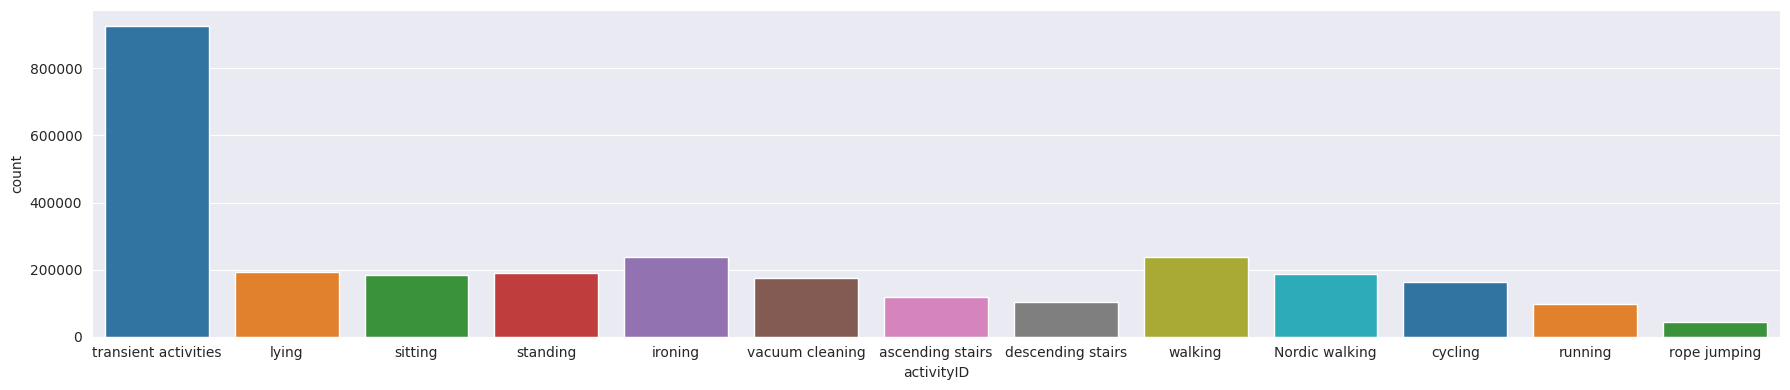

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(x=target,data=df,palette='tab10')
plt.tight_layout()

In [ ]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(2)

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,-69.2128,...,30.3125,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438
1,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,-69.2224,...,30.3125,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253


In [ ]:
y.head(2)

,activityID
0,transient activities
1,transient activities


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((2319848, 31), (2319848, 1))

In [ ]:
X_test.shape,y_test.shape

((286401, 31), (286401, 1))

In [ ]:
X_test.head(2)

,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,hand magnetometer Y,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
813592,154.0,28.8750,-9.70798,0.979840,2.00818,0.341182,-0.667454,0.817909,6.03481,-43.7597,...,30.5,15.9860,-2.59825,-1.10957,-0.913586,0.891266,-2.437970,-64.6404,-20.9881,19.3141
469530,98.0,34.3125,-3.12960,0.382488,8.84402,-0.812113,0.973754,0.573396,-1.92769,-19.2289,...,35.0,9.6535,-1.68136,-1.60469,0.116542,-0.004203,-0.144248,-36.0674,14.0464,38.7636


In [ ]:
y_test.head(2)

,activityID
813592,transient activities
469530,ironing


In [ ]:
X_train.columns,y_train.columns

(Index(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
        'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
        'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
        'hand magnetometer X', 'hand magnetometer Y', 'hand magnetometer Z',
        'chest temperature (°C)', 'chest acceleration X ±16g',
        'chest acceleration Y ±16g', 'chest acceleration Z ±16g',
        'chest gyroscope X', 'chest gyroscope Y', 'chest gyroscope Z',
        'chest magnetometer X', 'chest magnetometer Y', 'chest magnetometer Z',
        'ankle temperature (°C)', 'ankle acceleration X ±16g',
        'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
        'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
        'ankle magnetometer X', 'ankle magnetometer Y', 'ankle magnetometer Z'],
       dtype='object'),
 Index(['activityID'], dtype='object'))

In [ ]:
col_unique_val_check(X_train)

heart_rate                               ---->       6198 unique values   with dtype float64    at index 0
hand temperature (°C)                    ---->        207 unique values   with dtype float64    at index 1
hand acceleration X ±16g                 ---->    1115946 unique values   with dtype float64    at index 2
hand acceleration Y ±16g                 ---->    1178244 unique values   with dtype float64    at index 3
hand acceleration Z ±16g                 ---->    1144822 unique values   with dtype float64    at index 4
hand gyroscope X                         ---->    1687344 unique values   with dtype float64    at index 5
hand gyroscope Y                         ---->    1640539 unique values   with dtype float64    at index 6
hand gyroscope Z                         ---->    1628435 unique values   with dtype float64    at index 7
hand magnetometer X                      ---->    1039973 unique values   with dtype float64    at index 8
hand magnetometer Y                  

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319848 entries, 2795092 to 667562
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   heart_rate                 float64
 1   hand temperature (°C)      float64
 2   hand acceleration X ±16g   float64
 3   hand acceleration Y ±16g   float64
 4   hand acceleration Z ±16g   float64
 5   hand gyroscope X           float64
 6   hand gyroscope Y           float64
 7   hand gyroscope Z           float64
 8   hand magnetometer X        float64
 9   hand magnetometer Y        float64
 10  hand magnetometer Z        float64
 11  chest temperature (°C)     float64
 12  chest acceleration X ±16g  float64
 13  chest acceleration Y ±16g  float64
 14  chest acceleration Z ±16g  float64
 15  chest gyroscope X          float64
 16  chest gyroscope Y          float64
 17  chest gyroscope Z          float64
 18  chest magnetometer X       float64
 19  chest magnetometer Y       float64
 2

In [ ]:
num_col=X_train.columns.values
num_col

array(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X',
       'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X',
       'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z'], dtype=object)

In [ ]:
y_oh=OneHotEncoder()
l_eh=LabelEncoder()

oh=OneHotEncoder(handle_unknown='ignore')
ms,ss=MinMaxScaler(),StandardScaler()

ct=ColumnTransformer([
                        ('num_encoder',ss,num_col) ],
                        remainder='passthrough',n_jobs=-1)

ct

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_encoder', StandardScaler(),
                                 array(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'che...
       'chest acceleration Z ±16g', 'chest gyroscope X',
       'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X',
       'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z'], dtype=object))])

In [ ]:
X_train=ct.fit_transform(X_train)
X_val=ct.transform(X_val)
X_test=ct.transform(X_test)

In [ ]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())
    print("-"*50)

--------------------------------------------------
('num_encoder', StandardScaler(), array(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'chest acceleration X ±16g', 'chest acceleration Y ±16g',
       'chest acceleration Z ±16g', 'chest gyroscope X',
       'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X',
       'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z'], dtype=object))
['heart_rate' 'hand temperature (°C)' 'hand accelerat

In [ ]:
ct

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_encoder', StandardScaler(),
                                 array(['heart_rate', 'hand temperature (°C)', 'hand acceleration X ±16g',
       'hand acceleration Y ±16g', 'hand acceleration Z ±16g',
       'hand gyroscope X', 'hand gyroscope Y', 'hand gyroscope Z',
       'hand magnetometer X', 'hand magnetometer Y',
       'hand magnetometer Z', 'chest temperature (°C)',
       'che...
       'chest acceleration Z ±16g', 'chest gyroscope X',
       'chest gyroscope Y', 'chest gyroscope Z', 'chest magnetometer X',
       'chest magnetometer Y', 'chest magnetometer Z',
       'ankle temperature (°C)', 'ankle acceleration X ±16g',
       'ankle acceleration Y ±16g', 'ankle acceleration Z ±16g',
       'ankle gyroscope X', 'ankle gyroscope Y', 'ankle gyroscope Z',
       'ankle magnetometer X', 'ankle magnetometer Y',
       'ankle magnetometer Z'], dtype=object))])

In [ ]:
y_train.value_counts()

activityID          
transient activities    751298
walking                 193397
ironing                 193339
lying                   155944
standing                153844
Nordic walking          152366
sitting                 150002
vacuum cleaning         142036
cycling                 133326
ascending stairs         94945
descending stairs        85005
running                  79541
rope jumping             34805
dtype: int64

In [ ]:
y_oh.fit(y_train)
output_shape=len(y_oh.get_feature_names_out())

y_train_copy=l_eh.fit_transform(y_train)
y_val_copy=l_eh.transform(y_val)
y_test_copy=l_eh.transform(y_test)

y_train_tf_copy = tf.keras.utils.to_categorical(y_train_copy, num_classes=output_shape)
y_val_tf_copy = tf.keras.utils.to_categorical(y_val_copy, num_classes=output_shape)
y_test_tf_copy = tf.keras.utils.to_categorical(y_test_copy, num_classes=output_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
dict(enumerate(l_eh.classes_))

{0: 'Nordic walking',
 1: 'ascending stairs',
 2: 'cycling',
 3: 'descending stairs',
 4: 'ironing',
 5: 'lying',
 6: 'rope jumping',
 7: 'running',
 8: 'sitting',
 9: 'standing',
 10: 'transient activities',
 11: 'vacuum cleaning',
 12: 'walking'}

In [ ]:
X_train.shape,y_train.shape

((2319848, 31), (2319848, 1))

In [ ]:
X_test.shape,y_test.shape

((286401, 31), (286401, 1))

In [ ]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test_tf_copy[0])
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test_tf_copy[0])
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Normal Matrix to Dense Array


(array([ 1.71211991, -2.10731841, -0.78886068, -0.41436923, -0.30520798,
         0.26576272, -0.79138834,  0.56740253, -0.63351551, -1.2225142 ,
        -0.1643288 , -2.40593407,  0.77089036,  1.21584692, -0.95846199,
         1.14058622, -0.27402481, -1.28856312, -0.27013504, -0.79368872,
         0.22547653, -2.70391886,  1.13445227, -0.36326796,  0.38340658,
        -0.86027539,  1.55463225, -1.32690996, -1.69017095, -1.04822403,
         0.11786037]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [ ]:
batch_size=2048

In [ ]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train_tf_copy))
data_train_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val_tf_copy))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_te=tf.data.Dataset.from_tensor_slices((X_test, y_test_tf_copy))
data_test_x_y_batches = data_tf_te.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_test_x_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
n,m=5,4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,PReLU,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

l_relu=LeakyReLU()
para_relu = PReLU()
e=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)

y_train_tf_copy.shape

(2319848, 13)

In [ ]:
input_shape_val=X_train.shape[1]
X_train.shape,input_shape_val

((2319848, 31), 31)

In [ ]:
model=Sequential()

#Input Layer
model.add(Input(shape=(input_shape_val,)))

#Hidden Layer
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation='relu'))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))

#Output Layer
model.add(Dense(output_shape,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = [ 'accuracy',
                         tf.keras.metrics.AUC(name='AUC_ROC',curve='ROC',num_thresholds=10000) ,
                         tfa.metrics.F1Score(name='F1_Score',num_classes=output_shape,average='macro',threshold=0.5)
                        ]
             )


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 620)               20460     
                                                                 
 dense_1 (Dense)             (None, 620)               385640    
                                                                 
 dense_2 (Dense)             (None, 620)               385020    
                                                                 
 dense_3 (Dense)             (None, 620)               385640    
                                                                 
 dense_4 (Dense)             (None, 620)               385640    
                                                                 
 dense_5 (Dense)             (None, 13)                8073      
                                                                 
Total params: 1,568,613
Trainable params: 1,568,613
Non-

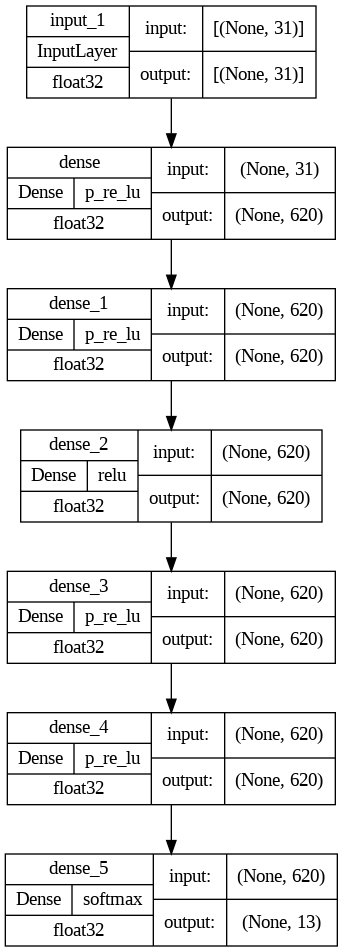

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,show_dtype=True,show_layer_activations=True)

In [ ]:
#only 10 epochs
%%time
history=model.fit(data_train_batches,epochs=10,callbacks=[e,reduce_lr],
                  validation_data=data_val_batches,verbose=1)

Epoch 1/10
1133/1133 [==============================] - 24s 14ms/step - loss: 0.1754 - accuracy: 0.9369 - AUC_ROC: 0.9986 - F1_Score: 0.9349 - val_loss: 0.0595 - val_accuracy: 0.9778 - val_AUC_ROC: 0.9998 - val_F1_Score: 0.9760 - lr: 0.0010
Epoch 2/10
1133/1133 [==============================] - 13s 11ms/step - loss: 0.0470 - accuracy: 0.9818 - AUC_ROC: 0.9999 - F1_Score: 0.9810 - val_loss: 0.0393 - val_accuracy: 0.9851 - val_AUC_ROC: 0.9999 - val_F1_Score: 0.9843 - lr: 0.0010
Epoch 3/10
1133/1133 [==============================] - 13s 11ms/step - loss: 0.0342 - accuracy: 0.9866 - AUC_ROC: 0.9999 - F1_Score: 0.9861 - val_loss: 0.0323 - val_accuracy: 0.9878 - val_AUC_ROC: 0.9999 - val_F1_Score: 0.9871 - lr: 0.0010
Epoch 4/10
1133/1133 [==============================] - 13s 12ms/step - loss: 0.0290 - accuracy: 0.9886 - AUC_ROC: 0.9999 - F1_Score: 0.9880 - val_loss: 0.0271 - val_accuracy: 0.9894 - val_AUC_ROC: 1.0000 - val_F1_Score: 0.9887 - lr: 0.0010
Epoch 5/10
1133/1133 [==============

In [ ]:
model.evaluate(data_test_x_y_batches)

140/140 [==============================] - 4s 27ms/step - loss: 0.0178 - accuracy: 0.9931 - AUC_ROC: 1.0000 - F1_Score: 0.9927


[0.017792832106351852,
 0.9931460022926331,
 0.999961793422699,
 0.9926798343658447]

In [ ]:
score_dict={};j=0

In [ ]:
def tester_func(model_list,X_test,y_test):
    for i,clf in enumerate(model_list):

        pred_proba=None;pred=None
        clf_name = clf.__class__.__name__

        try:
            pred_proba=clf.predict(X_test)
            pred=np.argmax(clf.predict(X_test), axis=-1)
        except NotFittedError as e:
            raise(e)

        print("-"*80)
        print(f"Predicting {clf_name} done")

        if(str(df[target].dtype)!='object'):
            print("Non object mode testing .........")
            score_dict[clf_name]={
                'roc_auc_score':roc_auc_score(y_test.values,pred_proba,multi_class='ovr'),
                'f1_score':f1_score(y_test.values,pred,average='macro'),
                'accuracy_score':accuracy_score(y_test.values,pred),
                'model_index':int(i)
            }

        else:
            print("Object mode testing .........")
            score_dict[clf_name]={
                'roc_auc_score':roc_auc_score(y_test,pred_proba,multi_class='ovr'),
                'f1_score':f1_score(y_test,pred,average='macro'),
                'accuracy_score':accuracy_score(y_test,pred),
                'model_index':int(i)
            }

        j=i

    print("-"*80)
    return j

In [ ]:
indexer=tester_func([model],X_test,y_test_copy)

8951/8951 [==============================] - 19s 2ms/step
--------------------------------------------------------------------------------
Predicting Sequential done
Object mode testing .........
--------------------------------------------------------------------------------


In [ ]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('f1_score',ascending=False)
score_pd

,accuracy_score,f1_score,model_index,roc_auc_score
Sequential,0.993146,0.992683,0.0,0.999969


In [ ]:
prediction=np.argmax(model.predict(X_test), axis=-1)
prediction

8951/8951 [==============================] - 37s 4ms/step


array([10,  4, 10, ...,  5,  4,  4])

In [ ]:
prediction=l_eh.inverse_transform(prediction)
prediction

array(['transient activities', 'ironing', 'transient activities', ...,
       'lying', 'ironing', 'ironing'], dtype=object)

In [ ]:
y_test

,activityID
813592,transient activities
469530,ironing
1562479,transient activities
1763068,transient activities
2459688,transient activities
...,...
1540041,vacuum cleaning
1234470,transient activities
850179,lying
92544,ironing


In [ ]:
print(classification_report( y_test.values , prediction ))

                      precision    recall  f1-score   support

      Nordic walking       1.00      0.99      1.00     18811
    ascending stairs       0.98      0.98      0.98     11722
             cycling       1.00      1.00      1.00     16460
   descending stairs       0.98      0.98      0.98     10494
             ironing       1.00      1.00      1.00     23869
               lying       1.00      0.99      1.00     19252
        rope jumping       0.99      0.98      0.99      4297
             running       1.00      0.99      0.99      9820
             sitting       1.00      1.00      1.00     18519
            standing       0.99      1.00      1.00     18993
transient activities       0.99      0.99      0.99     92753
     vacuum cleaning       1.00      0.99      1.00     17535
             walking       1.00      1.00      1.00     23876

            accuracy                           0.99    286401
           macro avg       0.99      0.99      0.99    286401
      

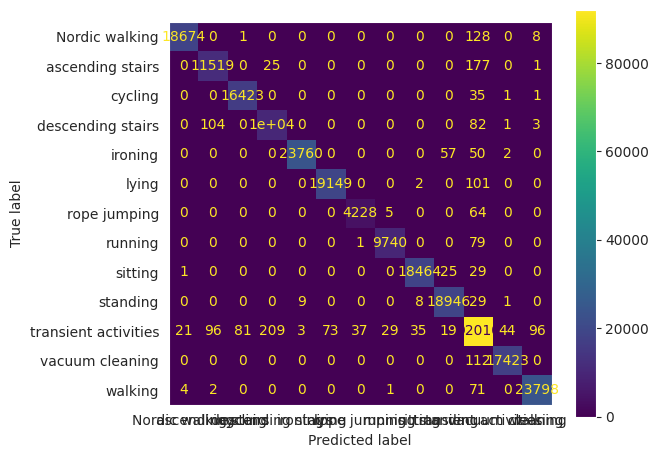

In [ ]:
sns.set_style('dark')
ConfusionMatrixDisplay.from_predictions( y_test.values , prediction )
plt.tight_layout()